In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import hist
hep.style.use("CMS")
mpl.rcParams['figure.facecolor'] = 'white'

Read in the data

In [2]:
results = np.load("DiscoRet_normalizedOutputs/disco_results.npy")
save_dir = 'DiscoRet_normalizedOutputs/'

suep_cl1 = results[0][results[2] == 1]
suep_cl2 = results[1][results[2] == 1]
qcd_cl1 = results[0][results[2] == 0]
qcd_cl2 = results[1][results[2] == 0]

Make 2D histograms using the ABCD variables.

In [16]:
hist_abcd = (
     hist.new
    .Regular(100, 0, 1, name="cl1", label="Classifier Output 1")
    .Regular(100, 0, 1, name="cl2", label="Classifier Output 2")
    .Weight()
)

hist_abcd.fill(qcd_cl1, qcd_cl2)

Hist(
  Regular(100, 0, 1, name='cl1', label='Classifier Output 1'),
  Regular(100, 0, 1, name='cl2', label='Classifier Output 2'),
  storage=Weight()) # Sum: WeightedSum(value=7430, variance=7430)

In [4]:
hist_abcd_suep = (
     hist.new
    .Regular(100, 0, 1, name="cl1", label="Classifier Output 1")
    .Regular(100, 0, 1, name="cl2", label="Classifier Output 2")
    .Weight()
)

hist_abcd_suep.fill(suep_cl1, suep_cl2)

Hist(
  Regular(100, 0, 1, name='cl1', label='Classifier Output 1'),
  Regular(100, 0, 1, name='cl2', label='Classifier Output 2'),
  storage=Weight()) # Sum: WeightedSum(value=3834, variance=3834)

Make 1D projections out of the 2D histograms.

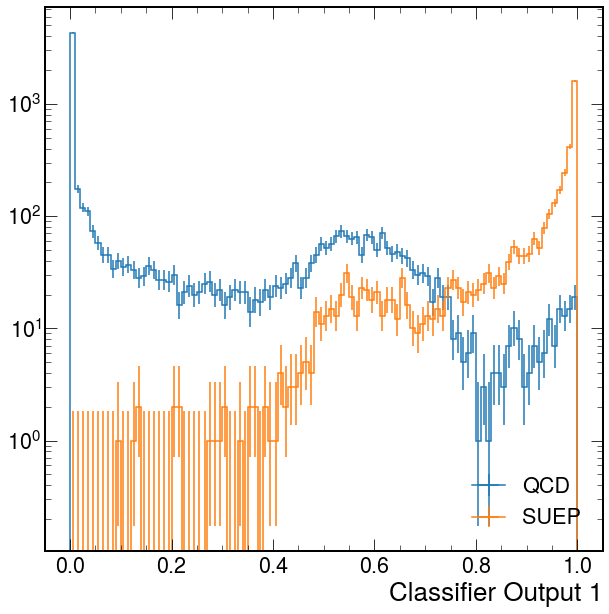

In [17]:
_ = hep.histplot(hist_abcd.project(0), label="QCD")
_ = hep.histplot(hist_abcd_suep.project(0), label="SUEP")
_ = plt.legend()
plt.yscale("log")
plt.savefig(save_dir+"1d_classifier_output_1.png")

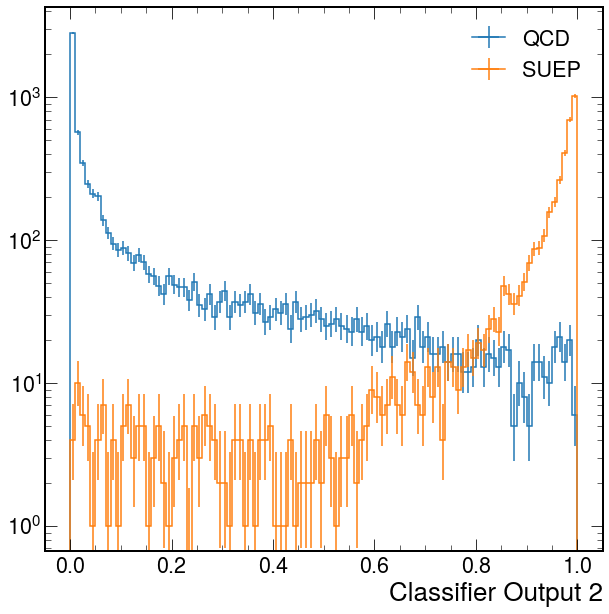

In [6]:
_ = hep.histplot(hist_abcd.project(1), label="QCD")
_ = hep.histplot(hist_abcd_suep.project(1), label="SUEP")
_ = plt.legend()
plt.yscale("log")
plt.savefig(save_dir+"1d_classifier_output_2.png")

Check for closure in D region for QCD.

In [18]:
cut1 = 0.5j
cut2 = 0.5j

A = hist_abcd[:cut1, :cut2]
B = hist_abcd[cut1:, :cut2]
C = hist_abcd[:cut1, cut2:]
D = hist_abcd[cut1:, cut2:]
D_exp = C.copy() * B.sum().value / A.sum().value

In [19]:
# FIXME: why why why why why do you need to cut again
D_cl = D[cut1::sum,cut2:]
D_exp_cl = D_exp[:cut1:sum,cut2:]

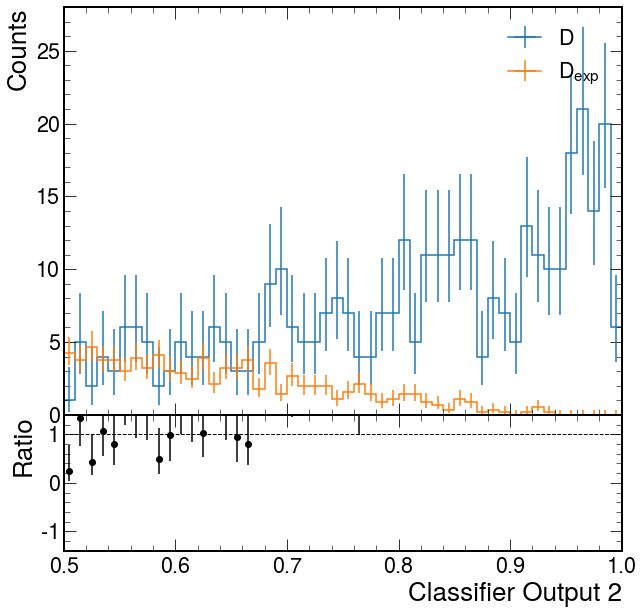

In [20]:
# Unclear documentation, arguments can be found in:
# https://github.com/scikit-hep/hist/blob/main/src/hist/plot.py
fig = plt.figure()
_ = D_cl.plot_ratio(D_exp_cl,
                   rp_num_label='D',
                   rp_denom_label='$D_{exp}$')
fig.axes[1].set_ylim(-1.4,1.4)
plt.savefig(save_dir + "D_closure.png")

Check for indendence of the two ABCD variables by making 1D histograms of different slices.

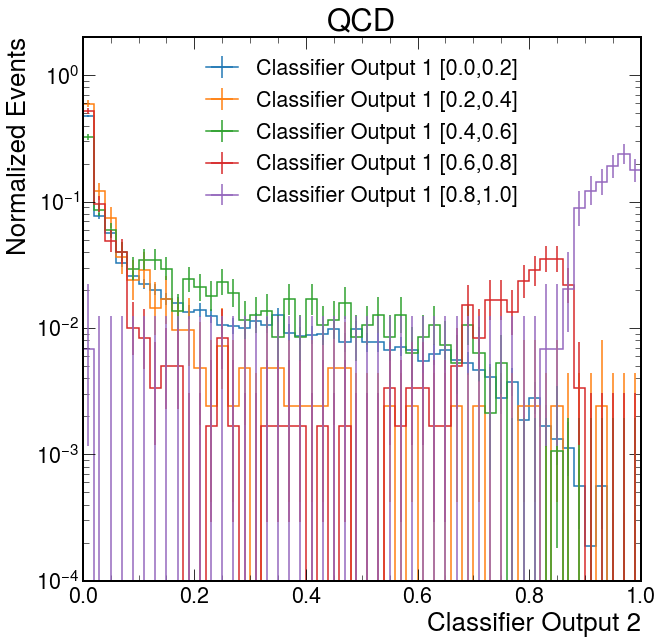

In [26]:
# parameters
save = True
slice_label = 'Classifier Output 1'            
slices = [[0.0j,0.2j],[0.2j,0.4j],[0.4j,0.6j],[0.6j,0.8j],[0.8j,1.0j]]

#  color map
cmap = plt.cm.rainbow(np.linspace(0, 1, len(slices)))

plt.clf()
for i in range(len(slices)):
    val_lo = slices[i][0]
    val_up = slices[i][1]
    
    h = hist_abcd[val_lo:val_up:sum,::2j]
            
    hep.histplot(h,
                 yerr=True, density=True, 
                 label=slice_label+" [{0},{1}]".format(val_lo.imag, val_up.imag))    

plt.legend()
plt.title("QCD")
plt.xlim(0.0,1.0)
plt.ylim(1e-4,2)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel("Classifier Output 2")
if save: plt.savefig(save_dir + "QCD_CL1_slices.png",  bbox_inches='tight')

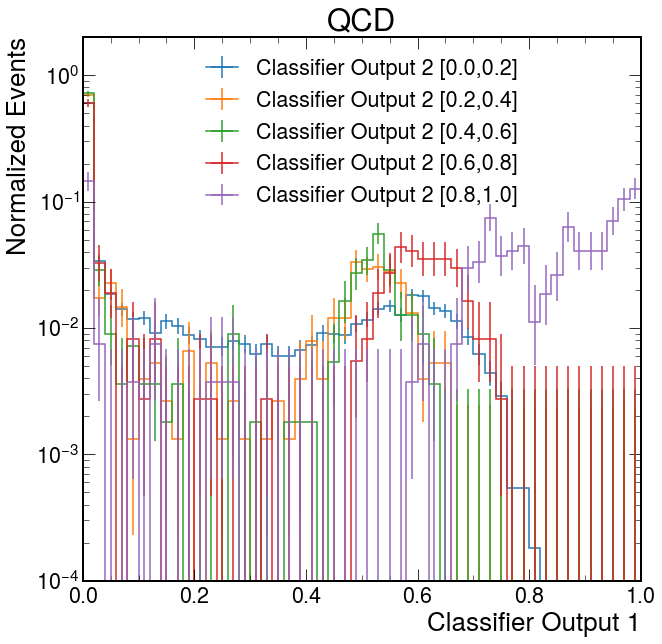

In [27]:
# parameters
save = True
slice_label = 'Classifier Output 2'            
slices = [[0.0j,0.2j],[0.2j,0.4j],[0.4j,0.6j],[0.6j,0.8j],[0.8j,1.0j]]

#  color map
cmap = plt.cm.rainbow(np.linspace(0, 1, len(slices)))

plt.clf()
for i in range(len(slices)):
    val_lo = slices[i][0]
    val_up = slices[i][1]
    
    h = hist_abcd[::2j, val_lo:val_up:sum]
            
    hep.histplot(h,
                 yerr=True, density=True, 
                 label=slice_label+" [{0},{1}]".format(val_lo.imag, val_up.imag))    

plt.legend()
plt.title("QCD")
plt.xlim(0.0,1.0)
plt.ylim(1e-4,2)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel("Classifier Output 1")
if save: plt.savefig(save_dir + "QCD_CL2_slices.png",  bbox_inches='tight')